# Supervised Learning: Logistic Regression

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.metrics import recall_score, make_scorer, roc_auc_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold, RandomizedSearchCV, GridSearchCV

## Read File


In [2]:
# Read dataFrame
file='DataPatients_train.csv'
df_train = pd.read_csv(file, sep=';',index_col=0, na_values='n.a.', dtype={'Stage': 'object', 'Age': 'float64'})

file='DataPatients_test.csv'
df_test = pd.read_csv(file, sep=';',index_col=0, na_values='n.a.', dtype={'Stage': 'object', 'Age': 'float64'})

## Remove some columns, numeric labels and Split X and Y

In [3]:
# Split X and Y
# Choose which label to use for ground truth (in this case class)

columns = df_train.columns    # 'ENSGxxxx' ... 'Sample ID', 'Stage', 'Sex', 'Age', 'Sample-supplying institution',
#                         'Training series', 'Evaluation series', 'Validation series',
#                         'Class_group', 'Patient_group'],
X_train = df_train[columns[0:-10]]
y_train_c = df_train[columns[-2]]

X_test = df_test[columns[0:-10]]
y_test_c= df_test[columns[-2]]

unique, counts = np.unique(y_train_c, return_counts=True)
print("Train")
print(unique)
print(counts)
print("Test")
unique, counts = np.unique(y_test_c, return_counts=True)
print(unique)
print(counts)

y_train = y_train_c.apply(lambda x: 1 if x == 'Malignant' else 0)
y_test = y_test_c.apply(lambda x: 1 if x == 'Malignant' else 0)

Train
['Malignant' 'nonMalignant']
[1313  566]
Test
['Malignant' 'nonMalignant']
[313 157]


Decissions taken:
* Variables: only genes (for the moment, not use sex, age, stage etc.)
* Ground truth: class_patient 
* Train with all nonMalignant (assymptomatics and symptomatics)

## Logistic Regression, 2881 genes, all patients

### Get the best estimator from the grid search (ran using only training data)

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

params = {
    'penalty': ['l2', None], 
    'solver': ['lbfgs', 'saga'], 
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [42]
    }

random_search_spe = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = params, random_state = 42, scoring = make_scorer(recall_score,pos_label=0), n_iter = 4, verbose=2)
random_search_spe.fit(X_train, y_train)

# Extract best parameters and best metric
print("Best params: ", random_search_spe.best_params_)
print("Best score: ", random_search_spe.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.4min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 3.0min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 2.4min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.1min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 2.3min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 3.0min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.6min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 6.4min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=

c:\Users\acard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=lbfgs; total time=  54.1s
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=lbfgs; total time=  45.0s
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=lbfgs; total time=  55.2s
[CV] END class_weight=None, max_iter=10000, penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=None, random_state=42, solver=saga; total time=   0.0s


c:\Users\acard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\acard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\acard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\acard\AppData\Local\Programs\Python

Best params:  {'solver': 'saga', 'random_state': 42, 'penalty': 'l2', 'max_iter': 10000, 'class_weight': 'balanced'}
Best score:  0.7897686694612638


In [10]:
results = pd.DataFrame(random_search_spe.cv_results_)
columns_r = list(results.columns)
# print(columns_r)
columns_r = columns_r[:4] + columns_r[10:-3] + columns_r[-2:-2]
results.drop(columns=columns_r, inplace = True)
results

,param_solver,param_random_state,param_penalty,param_max_iter,param_class_weight,params,mean_test_score,std_test_score,rank_test_score
0,saga,42,l2,10000,balanced,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.789769,0.035906,1
1,saga,42,l2,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.625415,0.040420,3
2,lbfgs,42,l2,10000,balanced,"{'solver': 'lbfgs', 'random_state': 42, 'penal...",0.658997,0.040687,2
3,saga,42,None,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",NaN,NaN,4


### Train the best estimator with training data and test it in test data


In [11]:
# Once hyperparameters have been optimized, the final model is trained and tested
model = random_search_spe.best_estimator_

model.fit(X_train, y_train)   # entrenamiento completo

y_pred = model.predict(X_test)
test_results = model.score(X_test, y_test) 
print('Test accuracy: ', np.round(test_results*100,4), '%')

Test accuracy:  80.4255 %


In [12]:
print("Tabla de métricas:\n", metrics.classification_report(y_test, y_pred))


Tabla de métricas:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74       157
           1       0.91      0.78      0.84       313

    accuracy                           0.80       470
   macro avg       0.79      0.82      0.79       470
weighted avg       0.83      0.80      0.81       470



In [13]:
print(metrics.confusion_matrix(y_test, y_pred))

[[134  23]
 [ 69 244]]


In [14]:
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(auc)

0.8785128507763375


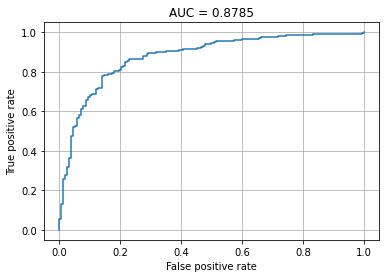

In [15]:
# Plot ROC curve
y_proba_test = model.predict_proba(X_test)
fpr, tpr, th = metrics.roc_curve(y_test, y_proba_test[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()

## LOGR: 2881 genes,  removing symptomatics from healthy

Article: Symptomatic controls were not included in the training and evaluation series because of their overrepresented prevalence as opposed to the asymptomatic controls, compared with a real-world setting.

In [17]:
print(df_train.shape, df_test.shape)

(1879, 2891) (470, 2891)


In [18]:
# Remove symptomatic nonMalignant cases
df_train_new = df_train.drop(df_train[(df_train['Class_group'] == 'nonMalignant') & (df_train['Patient_group'] != 'Asymptomatic controls')].index)
df_test_new = df_test.drop(df_test[(df_test['Class_group'] == 'nonMalignant') & (df_test['Patient_group'] != 'Asymptomatic controls')].index)

In [19]:
print(df_train_new.shape, df_test_new.shape)

(1619, 2891) (397, 2891)


In [20]:
columns = df_train_new.columns    # 'ENSGxxxx' ... 'Sample ID', 'Stage', 'Sex', 'Age', 'Sample-supplying institution',
#                         'Training series', 'Evaluation series', 'Validation series',
#                         'Class_group', 'Patient_group'],
X_train = df_train_new[columns[0:-10]]
y_train_c = df_train_new[columns[-2]]

X_test = df_test_new[columns[0:-10]]
y_test_c= df_test_new[columns[-2]]

unique, counts = np.unique(y_train_c, return_counts=True)
print("Train")
print(unique)
print(counts)
print("Test")
unique, counts = np.unique(y_test_c, return_counts=True)
print(unique)
print(counts)
y_train = y_train_c.apply(lambda x: 1 if x == 'Malignant' else 0)
y_test = y_test_c.apply(lambda x: 1 if x == 'Malignant' else 0)

Train
['Malignant' 'nonMalignant']
[1313  306]
Test
['Malignant' 'nonMalignant']
[313  84]


### Metric: Specificity

#### Find best hyperparameters

In [21]:
params = {
    'penalty': ['l2', None], 
    'solver': ['lbfgs', 'saga'], 
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [42]
    }

random_search_spe = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = params, random_state = 42, scoring = make_scorer(recall_score,pos_label=0), n_iter = 4, verbose=2)
random_search_spe.fit(X_train, y_train)

# Extract best parameters and best metric
print("Best params: ", random_search_spe.best_params_)
print("Best score: ", random_search_spe.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 1.8min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.3min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.3min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.0min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 3.8min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 3.6min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.3min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 4.7min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=

c:\Users\acard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\acard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\acard\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\acard\AppData\Local\Programs\Python

Best params:  {'solver': 'saga', 'random_state': 42, 'penalty': 'l2', 'max_iter': 10000, 'class_weight': 'balanced'}
Best score:  0.8432575356953992


In [22]:
results = pd.DataFrame(random_search_spe.cv_results_)
columns_r = list(results.columns)
# print(columns_r)
columns_r = columns_r[:4] + columns_r[10:-3] + columns_r[-2:-2]
results.drop(columns=columns_r, inplace = True)
results

,param_solver,param_random_state,param_penalty,param_max_iter,param_class_weight,params,mean_test_score,std_test_score,rank_test_score
0,saga,42,l2,10000,balanced,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.843258,0.036141,1
1,saga,42,l2,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.581597,0.051088,3
2,lbfgs,42,l2,10000,balanced,"{'solver': 'lbfgs', 'random_state': 42, 'penal...",0.719090,0.032021,2
3,saga,42,None,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",NaN,NaN,4


#### Train model and test it

In [23]:
# Once hyperparameters have been optimized, the final model is trained and tested
model = random_search_spe.best_estimator_

model.fit(X_train, y_train)   # entrenamiento completo

y_pred = model.predict(X_test)
test_results = model.score(X_test, y_test) 
print('Test accuracy: ', np.round(test_results*100,4), '%')

Test accuracy:  83.3753 %


In [24]:
print("Tabla de métricas:\n", metrics.classification_report(y_test, y_pred))


Tabla de métricas:
               precision    recall  f1-score   support

           0       0.57      0.82      0.68        84
           1       0.95      0.84      0.89       313

    accuracy                           0.83       397
   macro avg       0.76      0.83      0.78       397
weighted avg       0.87      0.83      0.84       397



In [25]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 69  15]
 [ 51 262]]


In [26]:
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(auc)

0.9195572797809219


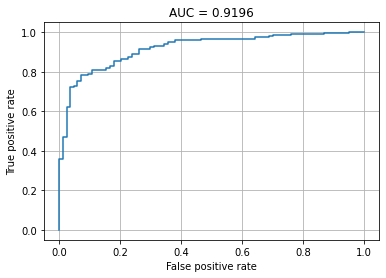

In [27]:
# Plot ROC curve
y_proba_test = model.predict_proba(X_test)
fpr, tpr, th = metrics.roc_curve(y_test, y_proba_test[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()

## LOGR, 9 genes, all patients

In [28]:
# Find biomarker panel genes
file='1-s2.0-S1535610822003701-mmc4.xlsx'
df1 = pd.read_excel(file, header=2, index_col=0)
df1.drop(["hgnc_symbol","description"], axis=1, inplace=True)
df1.rename(columns={'In Tumor-site-of-origin algorithm biomarker panel' : 'biomarker panel'}, inplace=True)
dfbp = df1.loc[df1['biomarker panel'] == 1]
dfbpr = dfbp.drop_duplicates()
dfbpr.shape

(10, 2)

In [29]:
# Check if all genes are in df_train (we know for sure at least one is not)
genes_biomarkers = list(dfbpr['ensembl_gene_id'])
genes_biomarkers

['ENSG00000142089',
 'ENSG00000114439',
 'ENSG00000109971',
 'ENSG00000096060',
 'ENSG00000177556',
 'ENSG00000071859',
 'ENSG00000228651',
 'ENSG00000198168',
 'ENSG00000215301',
 'ENSG00000142546']

In [30]:
genes_df_train = list(df_train.columns[:-10])

In [31]:
genes_df_train_red = []

for gene in genes_biomarkers:
  if gene not in genes_df_train:
        print(gene, " was removed")
  else:
        genes_df_train_red.append(gene)

ENSG00000114439  was removed
ENSG00000228651  was removed


In [32]:
genes_df_train_red.append('Class_group')

In [33]:
# Get the subset of df_train with only 8 genes
df_train_9genes_allpatients = df_train[genes_df_train_red]
df_train_9genes_allpatients.shape

(1879, 9)

In [34]:
df_test_9genes_allpatients = df_test[genes_df_train_red]
df_test_9genes_allpatients.shape

(470, 9)

In [35]:
# Get X_train, y_train, X_test and y_test
X_train = df_train_9genes_allpatients[genes_df_train_red[0:-1]]
y_train_c = df_train[genes_df_train_red[-1]]

X_test = df_test_9genes_allpatients[genes_df_train_red[0:-1]]
y_test_c= df_test_9genes_allpatients[genes_df_train_red[-1]]

y_train = y_train_c.apply(lambda x: 1 if x == 'Malignant' else 0)
y_test = y_test_c.apply(lambda x: 1 if x == 'Malignant' else 0)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1879, 8) (470, 8) (1879,) (470,)


In [40]:
params = {
    'penalty': ['l2', 'none'], 
    'solver': ['lbfgs', 'saga'], 
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [42]
    }

random_search_spe = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = params, random_state = 42, scoring = make_scorer(recall_score,pos_label=0), n_iter = 4, verbose=2)
random_search_spe.fit(X_train, y_train)

# Extract best parameters and best metric
print("Best params: ", random_search_spe.best_params_)
print("Best score: ", random_search_spe.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=

In [41]:
results = pd.DataFrame(random_search_spe.cv_results_)
columns_r = list(results.columns)
# print(columns_r)
columns_r = columns_r[:4] + columns_r[10:-3] + columns_r[-2:-2]
results.drop(columns=columns_r, inplace = True)
results

,param_solver,param_random_state,param_penalty,param_max_iter,param_class_weight,params,mean_test_score,std_test_score,rank_test_score
0,saga,42,l2,10000,balanced,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.731393,0.046636,2
1,saga,42,l2,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.136004,0.031263,3
2,lbfgs,42,l2,10000,balanced,"{'solver': 'lbfgs', 'random_state': 42, 'penal...",0.777317,0.021812,1
3,saga,42,none,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.136004,0.031263,3


Test accuracy:  67.6596 %
Tabla de métricas:
               precision    recall  f1-score   support

           0       0.51      0.80      0.62       157
           1       0.86      0.62      0.72       313

    accuracy                           0.68       470
   macro avg       0.68      0.71      0.67       470
weighted avg       0.74      0.68      0.69       470

[[125  32]
 [120 193]]
0.7671394558515292


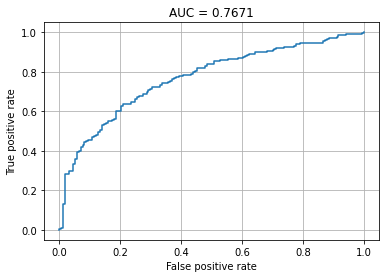

In [42]:
# Once hyperparameters have been optimized, the final model is trained and tested
model = random_search_spe.best_estimator_

model.fit(X_train, y_train)   # entrenamiento completo

y_pred = model.predict(X_test)
test_results = model.score(X_test, y_test) 
print('Test accuracy: ', np.round(test_results*100,4), '%')

print("Tabla de métricas:\n", metrics.classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(auc)

# Plot ROC curve
y_proba_test = model.predict_proba(X_test)
fpr, tpr, th = metrics.roc_curve(y_test, y_proba_test[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()

## LOGR, all 5251 genes, all patients

5440 - 91 -98 = 5251

In [43]:
print(df_train.shape, df_test.shape)

(1879, 2891) (470, 2891)


In [44]:
# Read merged dataFrame with Outliers removed
file='DataPatientsWithGTNoOutliers.csv'
df = pd.read_csv(file,sep=';',index_col=0, na_values='n.a.', dtype={'Stage': 'object', 'Age': 'float64'})

In [45]:
df.shape

(2349, 5261)

In [ ]:
# I want to keep patients name from df_train and df_test but keep columns from df

In [50]:
df_train_index = df_train.index
# len(df_train_index)
df_test_index = df_test.index
len(df_test_index)

470

In [53]:
df_train_allgenes = df.loc[df_train_index]
# df_train_allgenes.shape
df_test_allgenes = df.loc[df_test_index]

In [54]:
# Split X and Y
# Choose which label to use for ground truth (in this case class)

columns = df_train_allgenes.columns    # 'ENSGxxxx' ... 'Sample ID', 'Stage', 'Sex', 'Age', 'Sample-supplying institution',
#                         'Training series', 'Evaluation series', 'Validation series',
#                         'Class_group', 'Patient_group'],
X_train = df_train_allgenes[columns[0:-10]]
y_train_c = df_train_allgenes[columns[-2]]

X_test = df_test_allgenes[columns[0:-10]]
y_test_c= df_test_allgenes[columns[-2]]

unique, counts = np.unique(y_train_c, return_counts=True)
print("Train")
print(unique)
print(counts)
print("Test")
unique, counts = np.unique(y_test_c, return_counts=True)
print(unique)
print(counts)

y_train = y_train_c.apply(lambda x: 1 if x == 'Malignant' else 0)
y_test = y_test_c.apply(lambda x: 1 if x == 'Malignant' else 0)

Train
['Malignant' 'nonMalignant']
[1313  566]
Test
['Malignant' 'nonMalignant']
[313 157]


In [55]:
X_train.shape

(1879, 5251)

In [56]:
params = {
    'penalty': ['l2', 'none'], 
    'solver': ['lbfgs', 'saga'], 
    'class_weight': ['balanced', None],
    'max_iter': [10000],
    'random_state': [42]
    }

random_search_spe = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = params, random_state = 42, scoring = make_scorer(recall_score,pos_label=0), n_iter = 4, verbose=2)
random_search_spe.fit(X_train, y_train)

# Extract best parameters and best metric
print("Best params: ", random_search_spe.best_params_)
print("Best score: ", random_search_spe.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 7.3min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 7.7min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 8.2min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 7.8min
[CV] END class_weight=balanced, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 7.7min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 7.5min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 7.3min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=saga; total time= 9.9min
[CV] END class_weight=None, max_iter=10000, penalty=l2, random_state=42, solver=

In [57]:
results = pd.DataFrame(random_search_spe.cv_results_)
columns_r = list(results.columns)
# print(columns_r)
columns_r = columns_r[:4] + columns_r[10:-3] + columns_r[-2:-2]
results.drop(columns=columns_r, inplace = True)
results

,param_solver,param_random_state,param_penalty,param_max_iter,param_class_weight,params,mean_test_score,std_test_score,rank_test_score
0,saga,42,l2,10000,balanced,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.789769,0.035906,1
1,saga,42,l2,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.625400,0.038571,3
2,lbfgs,42,l2,10000,balanced,"{'solver': 'lbfgs', 'random_state': 42, 'penal...",0.660736,0.040126,2
3,saga,42,none,10000,None,"{'solver': 'saga', 'random_state': 42, 'penalt...",0.625400,0.038571,3


Test accuracy:  80.4255 %
Tabla de métricas:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74       157
           1       0.91      0.78      0.84       313

    accuracy                           0.80       470
   macro avg       0.79      0.82      0.79       470
weighted avg       0.83      0.80      0.81       470

[[134  23]
 [ 69 244]]
0.8785942492012779


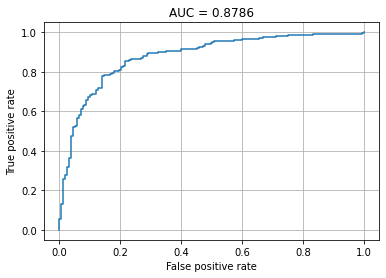

In [58]:
# Once hyperparameters have been optimized, the final model is trained and tested
model = random_search_spe.best_estimator_

model.fit(X_train, y_train)   # entrenamiento completo

y_pred = model.predict(X_test)
test_results = model.score(X_test, y_test) 
print('Test accuracy: ', np.round(test_results*100,4), '%')

print("Tabla de métricas:\n", metrics.classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(auc)

# Plot ROC curve
y_proba_test = model.predict_proba(X_test)
fpr, tpr, th = metrics.roc_curve(y_test, y_proba_test[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()